## Installing And Importing Required Libraries

In [20]:
import numpy as np
import pandas as pd

In [21]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

In [23]:
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats

In [24]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [25]:
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [26]:
df = pd.read_csv('Datasets/insurance.csv')
df.head(15)

original_df = df.copy()

## Data Preprocessing

In [27]:
# Categorizing Age Ranges
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'

In [28]:
# Categorizing BMI Weight Ranges
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

age     sex     bmi  children smoker     region      charges      age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400  Young Adult   
1   18    male  33.770         1     no  southeast   1725.55230  Young Adult   
2   28    male  33.000         3     no  southeast   4449.46200  Young Adult   
3   33    male  22.705         0     no  northwest  21984.47061  Young Adult   
4   32    male  28.880         0     no  northwest   3866.85520  Young Adult   

  weight_condition  
0       Overweight  
1            Obese  
2            Obese  
3    Normal Weight  
4       Overweight

In [29]:
# Checking For Null Values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, age_cat, weight_condition]
Index: []

In [30]:
# Adding New Column Data Called Charge_Status
obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

age     sex     bmi  children smoker     region      charges      age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400  Young Adult   
1   18    male  33.770         1     no  southeast   1725.55230  Young Adult   
2   28    male  33.000         3     no  southeast   4449.46200  Young Adult   
3   33    male  22.705         0     no  northwest  21984.47061  Young Adult   
4   32    male  28.880         0     no  northwest   3866.85520  Young Adult   

  weight_condition  charge_status  
0       Overweight  Above Average  
1            Obese  Below Average  
2            Obese  Below Average  
3    Normal Weight  Above Average  
4       Overweight  Below Average

In [31]:
# Checking For Null Values
df["charge_status"].isnull().sum()

0

## Training The Model

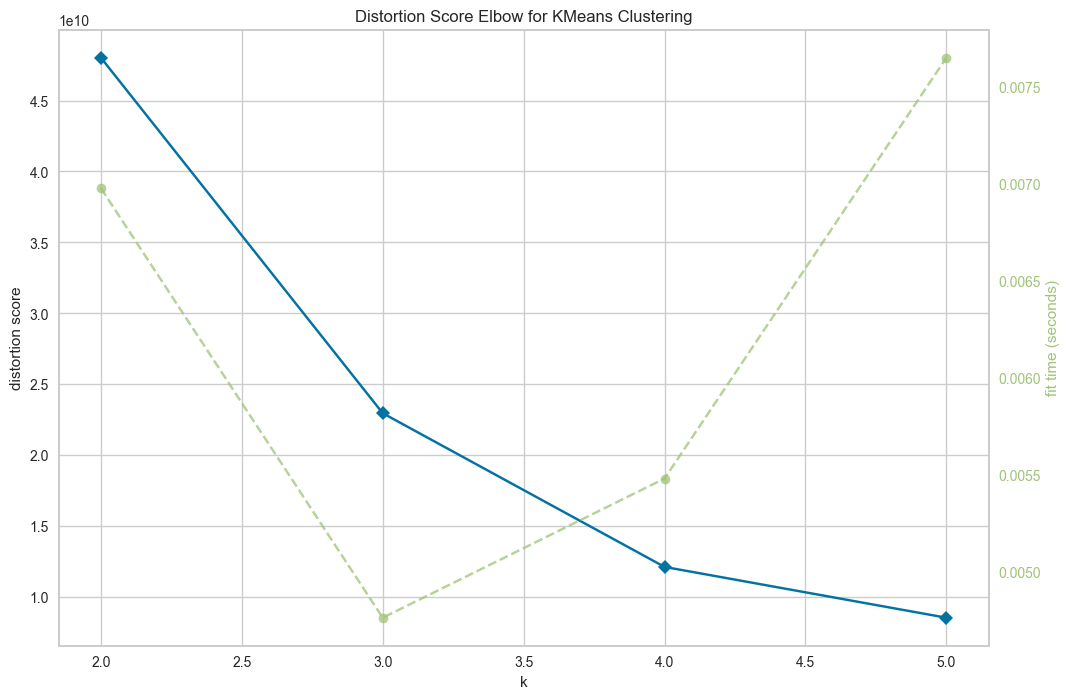

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Declaring Clustering Model And Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [33]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [34]:
# Centroids
print(kmeans.cluster_centers_)

[[3.04914379e+01 6.64518950e+03]
 [2.86605703e+01 1.97839119e+04]
 [3.50239172e+01 4.10979122e+04]]


In [35]:
# Labels
print(kmeans.labels_)

[1 0 0 ... 0 0 1]


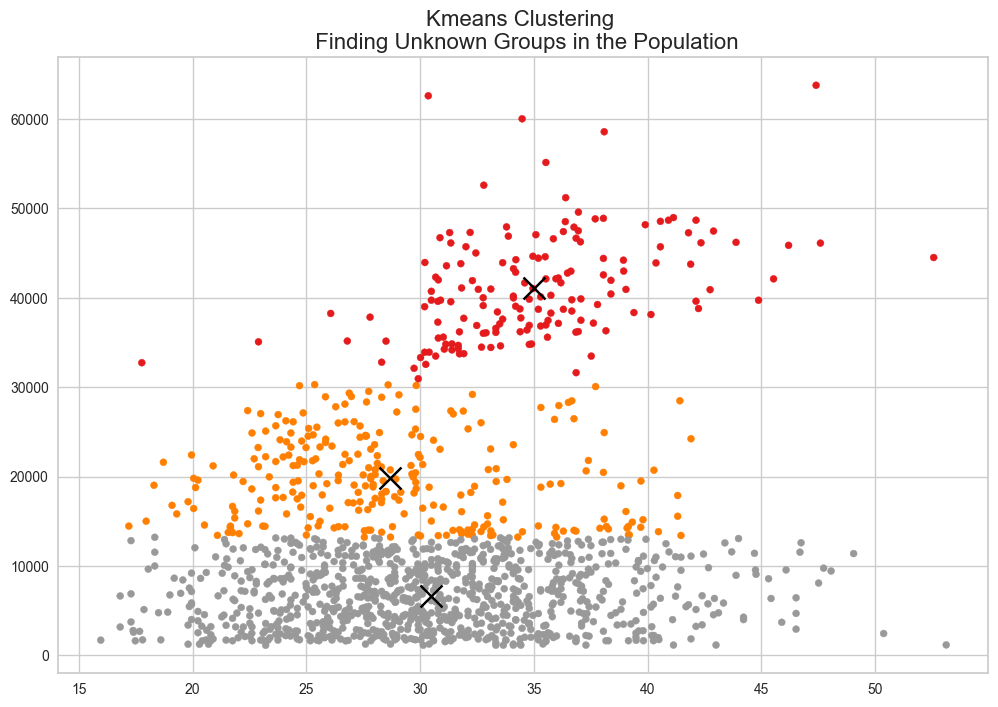

In [36]:
# K-Means Illustration
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()